# 1. Load of the Data

In [5]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# 2. Plots

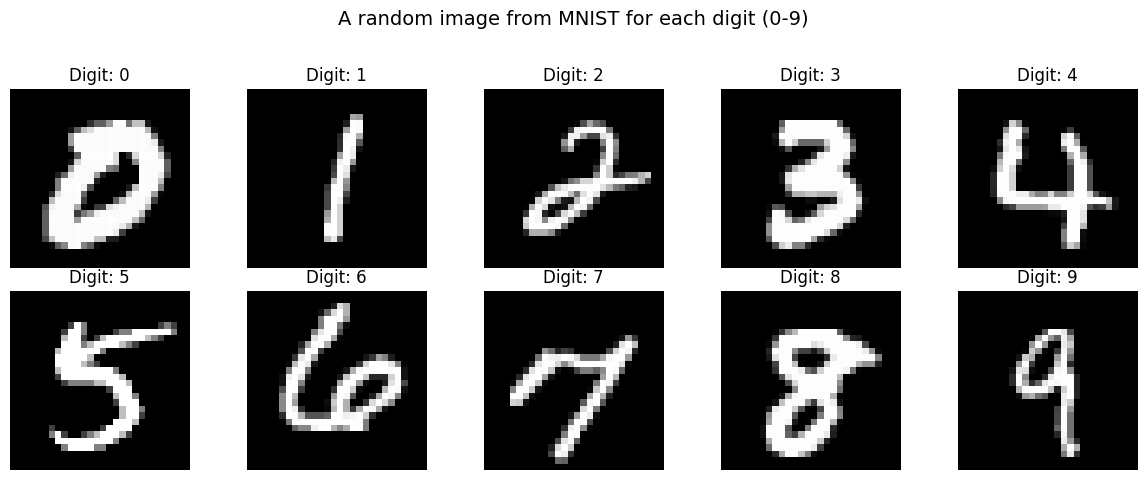

In [6]:
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

np.random.seed(42)

examples = []
labels = list(range(10))
for digit in labels:
    indices = np.where(y_train == digit)[0]
    choice = np.random.choice(indices)
    examples.append(x_train[choice])

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i, ax in enumerate(axes):
    ax.imshow(examples[i], cmap='gray', vmin=0, vmax=255)
    ax.set_title(f"Digit: {labels[i]}", fontsize=12)
    ax.axis('off')

plt.suptitle("A random image from MNIST for each digit (0-9)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Size of each image

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


The size of each image is 28X28 pixels, so 784 pixels in general.
I would say that not all pixels are important for the image. In particular, those that are further away from the center and are always blurred do not help in distinguishing the numbers. Meanwhile, those in the center have more information about each number. Also, for each number, the important pixels and the unimportant pixels are different.

# 4. Make images into vectors

In [8]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(" x_train:", x_train_flat.shape)
print(" x_test:", x_test_flat.shape)

 x_train: (60000, 784)
 x_test: (10000, 784)


# 5. Training and Line Plot

Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
N_train = 10000
x_train_small = x_train_flat[:N_train]
y_train_small = y_train[:N_train]

k_values = [5, 15, 51, int(np.sqrt(N_train))]

train_accuracies = []
test_accuracies = []

print("k values:", k_values)

for k in k_values:
    print(f"\nTraining KNN with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_small, y_train_small)

    y_pred_train = knn.predict(x_train_small)
    train_acc = accuracy_score(y_train_small, y_pred_train)

    y_pred_test = knn.predict(x_test_flat)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy:  {test_acc:.4f}")



k values: [5, 15, 51, 100]

Training KNN with k = 5
Train accuracy: 0.9669
Test accuracy:  0.9442

Training KNN with k = 15
Train accuracy: 0.9459
Test accuracy:  0.9348

Training KNN with k = 51
Train accuracy: 0.9168
Test accuracy:  0.9120

Training KNN with k = 100
Train accuracy: 0.8936
Test accuracy:  0.8942


Line PLot

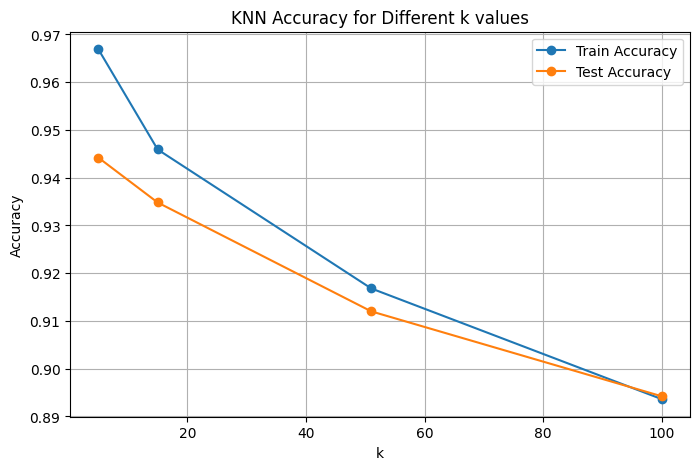

In [11]:
plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(k_values, test_accuracies, marker='o', label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k values")
plt.grid(True)
plt.legend()
plt.show()

# 6. Normlization of the images

In [12]:
x_train_norm = x_train_flat / 255.0
x_test_norm = x_test_flat / 255.0

In [13]:
N_train = 10000
x_train_small = x_train_norm[:N_train]
y_train_small = y_train[:N_train]

k values

In [14]:
k_values = [5, 15, 51, int(np.sqrt(N_train))]

train_accuracies_norm = []
test_accuracies_norm = []

print("k values:", k_values)

k values: [5, 15, 51, 100]


Training and evaluation

In [15]:
for k in k_values:
    print(f"\nTraining KNN (normalized) with k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_small, y_train_small)


    y_pred_train = knn.predict(x_train_small)
    train_acc = accuracy_score(y_train_small, y_pred_train)


    y_pred_test = knn.predict(x_test_norm)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_accuracies_norm.append(train_acc)
    test_accuracies_norm.append(test_acc)

    print(f"Train accuracy: {train_acc:.4f}")
    print(f"Test accuracy:  {test_acc:.4f}")


Training KNN (normalized) with k = 5
Train accuracy: 0.9669
Test accuracy:  0.9442

Training KNN (normalized) with k = 15
Train accuracy: 0.9459
Test accuracy:  0.9348

Training KNN (normalized) with k = 51
Train accuracy: 0.9168
Test accuracy:  0.9120

Training KNN (normalized) with k = 100
Train accuracy: 0.8936
Test accuracy:  0.8942


Plot

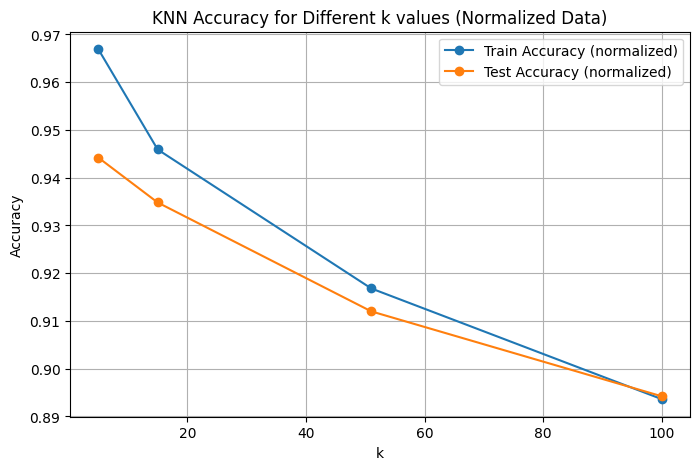

In [16]:
plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies_norm, marker='o', label="Train Accuracy (normalized)")
plt.plot(k_values, test_accuracies_norm, marker='o', label="Test Accuracy (normalized)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k values (Normalized Data)")
plt.grid(True)
plt.legend()
plt.show()

I don't think I did anything wrong, but I don't see any significant difference in the graph for question 6 after normalisation compared to the graph for question 5...

# 7. Drawing a Custom 28×28 Digit and Classifying It Using KNN

In [17]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving New Piskel.png to New Piskel (1).png


Convertion of the image to black and white

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

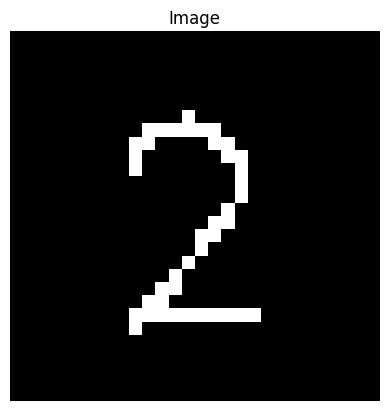

In [19]:
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Image")
plt.axis('off')